# Conduct a statistical analysis

Name: Sabrina Palis

Dataset: Space Mission Launches (Kaggle) https://www.kaggle.com/datasets/sefercanapaydn/mission-launches

Repository: https://github.com/MinervaRose/conduct-a-statistical-analysis-using-python

Environment Setup

This notebook is designed to run locally or in Colab. Dataset is loaded relative to the project directory.

In [1]:
# Optional: Google Colab setup
# Uncomment only if running in Google Colab and using Google Drive storage
#Mount drive
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Go to directory
# %cd /content/drive/MyDrive/Capstone/conduct-a-statistical-analysis/

/content/drive/MyDrive/Capstone/conduct-a-statistical-analysis


In [3]:
DATA_PATH = "mission-launches.csv"

## Setup

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd

## 1. Data Loading and Inspection

In [5]:
path = "/content/drive/MyDrive/Capstone/conduct-a-statistical-analysis/mission_launches.csv"
df = pd.read_csv(path)

df.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [6]:
# Confirm structure
print("Shape:", df.shape)
print("\nColumns:")
print(df.columns)

print("\nData types:")
print(df.dtypes)

Shape: (4324, 9)

Columns:
Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

Data types:
Unnamed: 0.1       int64
Unnamed: 0         int64
Organisation      object
Location          object
Date              object
Detail            object
Rocket_Status     object
Price             object
Mission_Status    object
dtype: object


In [7]:
# Drop unnecessary index columns
df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

# Convert Price to numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

df.dtypes

,0
Organisation,object
Location,object
Date,object
Detail,object
Rocket_Status,object
Price,float64
Mission_Status,object


The dataset contains 4,324 mission records and 9 variables. Two index columns were removed because they do not contain analytical information. The Price column was converted to numeric format to allow statistical analysis. The dataset now contains both numeric and categorical variables suitable for hypothesis testing.

## 2. Descriptive Statistics

### 2.1 Summary Statistics

In [8]:
df.describe()

,Price
count,949.000000
mean,129.795237
std,143.220323
min,5.300000
25%,40.000000
50%,62.000000
75%,164.000000
max,450.000000


The Price variable includes 949 recorded launch costs out of 4,324 missions,
indicating that many missions do not report pricing data. Among available values,
the average launch price is approximately 130 million, with a wide range from
5.3 million to 450 million. The large standard deviation suggests substantial
variation in mission costs across organizations and mission types.

### 2.2 Categorical Counts

In [9]:
df['Mission_Status'].value_counts()

,count
Mission_Status,
Success,3879
Failure,339
Partial Failure,102
Prelaunch Failure,4


Most missions in the dataset are classified as successful, with 3,879 successes
compared to far fewer failures or partial failures. This imbalance indicates that
launch success is common in the recorded data.

In [10]:
df['Organisation'].value_counts().head(10)

,count
Organisation,
RVSN USSR,1777
Arianespace,279
General Dynamics,251
CASC,251
NASA,203
VKS RF,201
US Air Force,161
ULA,140
Boeing,136


Launch activity is heavily concentrated
among a few organizations, with RVSN USSR accounting for the largest share of missions,
followed by Arianespace and several major aerospace agencies.

### 2.3. Distribution of numeric variable

In [11]:
df['Price'].describe()

,Price
count,949.000000
mean,129.795237
std,143.220323
min,5.300000
25%,40.000000
50%,62.000000
75%,164.000000
max,450.000000


In [12]:
df['Price'].isna().sum()

np.int64(3375)

The Price variable contains 949 recorded values and 3,375 missing values,
meaning most missions do not include pricing information. Among available data,
launch costs vary widely, ranging from 5.3 million to 450 million. The large
standard deviation and spread between quartiles indicate high variability in
mission pricing, suggesting that cost differences across missions are substantial.

## 3. Visualizations

### Visualization 1 — Price Distribution (Risk variability)


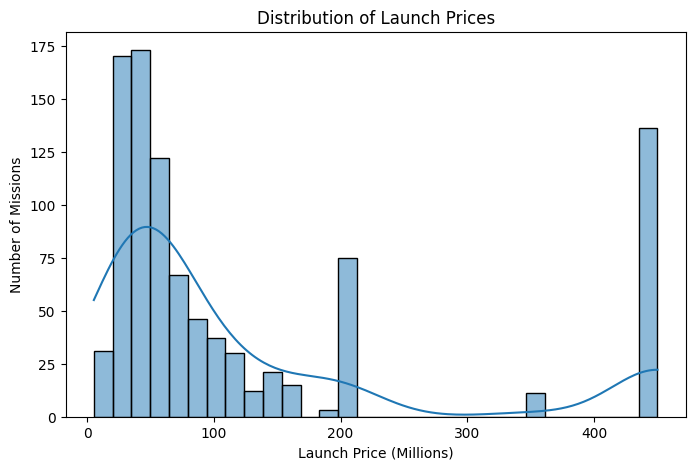

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=30, kde=True)

plt.title("Distribution of Launch Prices")
plt.xlabel("Launch Price (Millions)")
plt.ylabel("Number of Missions")
plt.show()

This histogram shows the distribution of recorded launch prices. Most missions fall into lower cost ranges, while a smaller number of launches are extremely expensive. The distribution is right-skewed, indicating that a few high-cost missions heavily influence the overall spread of prices.

### Visualization 2 — Price vs Mission Outcome (risk comparison)

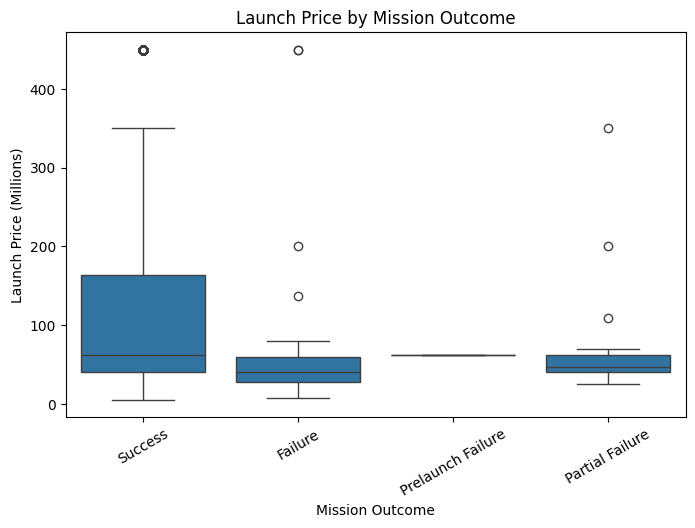

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Mission_Status', y='Price', data=df)

plt.title("Launch Price by Mission Outcome")
plt.xlabel("Mission Outcome")
plt.ylabel("Launch Price (Millions)")
plt.xticks(rotation=30)
plt.show()

The boxplot compares launch prices across mission outcomes. All mission categories show wide variability in cost, and high-cost launches appear in both successful and unsuccessful missions. This suggests that launch price alone does not guarantee mission reliability.

### Visualization 3 — Mission Outcomes (risk frequency)

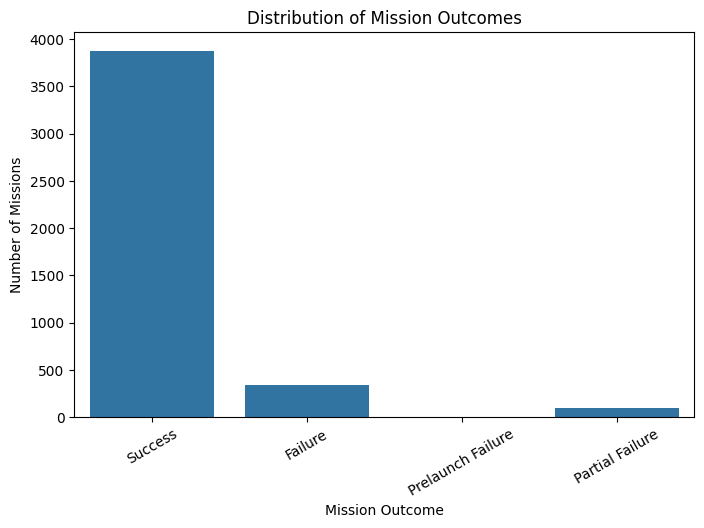

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(x='Mission_Status', data=df)

plt.title("Distribution of Mission Outcomes")
plt.xlabel("Mission Outcome")
plt.ylabel("Number of Missions")
plt.xticks(rotation=30)
plt.show()

This bar chart shows that successful missions vastly outnumber failures and partial failures. The imbalance indicates that most launches in the dataset achieve their intended outcome, reflecting a generally high level of operational reliability.

### Visualization 4 — Top Organizations (risk concentration)

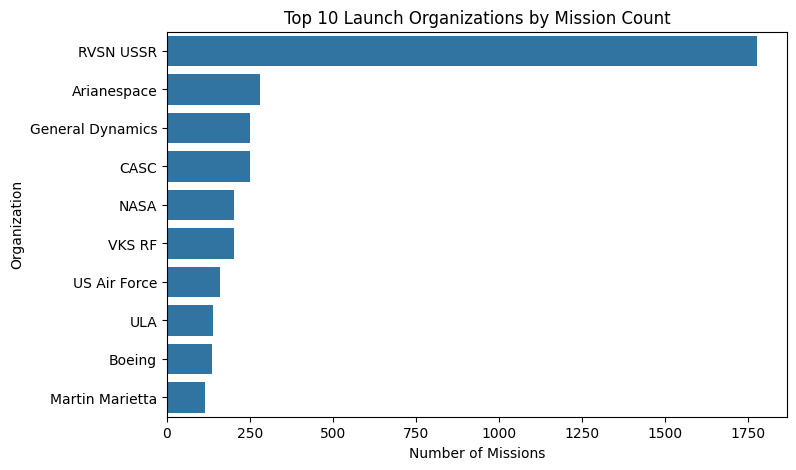

In [16]:
top_orgs = df['Organisation'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_orgs.values, y=top_orgs.index)

plt.title("Top 10 Launch Organizations by Mission Count")
plt.xlabel("Number of Missions")
plt.ylabel("Organization")
plt.show()

This chart highlights the concentration of launch activity among a small number of organizations. A few major agencies account for a large share of missions, suggesting that launch risk exposure is not evenly distributed across the aerospace industry.

### Visualization 5 — Price Over Time (risk trend)

In [17]:
# Convert date
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

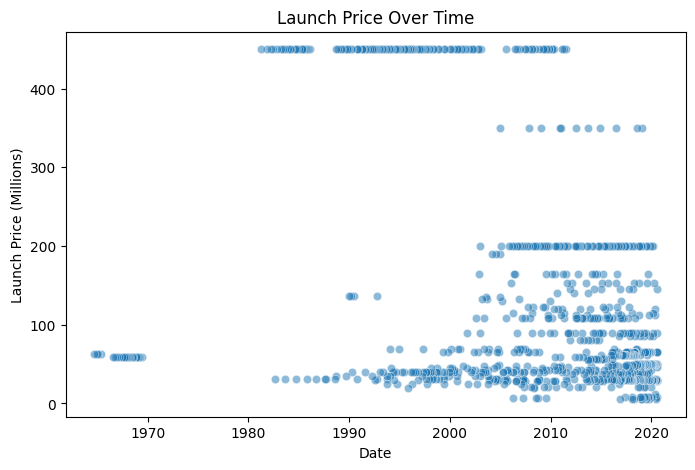

In [18]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Date', y='Price', data=df, alpha=0.5)

plt.title("Launch Price Over Time")
plt.xlabel("Date")
plt.ylabel("Launch Price (Millions)")
plt.show()

The scatter plot shows substantial variation in launch prices over time. While prices fluctuate considerably, there is no simple linear trend, indicating that mission cost is influenced by complex factors rather than steady time-based growth.

## 4. Hypothesis Testing

**Null hypothesis (H0)**: The average launch price of successful missions is equal to
the average launch price of failed missions.

**Alternative hypothesis (H1)**: The average launch price of successful missions is
different from the average launch price of failed missions.

This is a two-tailed test.

In [21]:
success_prices = df[df['Mission_Status'] == 'Success']['Price'].dropna()
failure_prices = df[df['Mission_Status'] == 'Failure']['Price'].dropna()

print("Success sample size:", len(success_prices))
print("Failure sample size:", len(failure_prices))

Success sample size: 896
Failure sample size: 36


The groups are large enough for a t-test.

We use Welch’s t-test (equal_var=False) because the spreads are very different.

In [20]:
t_stat, p_value = stats.ttest_ind(success_prices, failure_prices, equal_var=False)

print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 3.7662135835289257
p-value: 0.0005212324918944673


The Welch independent t-test produced a test statistic of 3.77 and a p-value of
0.00052. These results quantify the difference in average launch prices between
successful and failed missions. A full interpretation of statistical significance and practical implications will be discussed in the written report.

## Summary

This notebook explored historical space mission data with a focus on launch cost and mission reliability. Descriptive statistics and visualizations revealed large variability in pricing and a strong imbalance toward successful missions. The hypothesis test showed a statistically measurable difference in average launch cost between successful and failed missions. One unexpected finding was the extreme skew in pricing, with a small number of very expensive launches influencing the overall distribution. A major challenge was the large amount of missing pricing data, which reduced the sample size available for cost-based analysis.

### References
Space Mission Launches dataset (Kaggle) https://www.kaggle.com/datasets/sefercanapaydn/mission-launches

In [22]:
!pip freeze > requirements.txt